In [107]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [108]:
train_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Titanic%20-%20Machine%20Learning%20from%20Disaster/train.csv")
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
train_data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [109]:
train_data.loc[train_data['Ticket']=='347077']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S


In [110]:
train_data.loc[train_data['Ticket']=='349909']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S


In [111]:
print(train_data.shape)
print(train_data.info())
train_data.describe()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
def cat_var(data):
    return list(data.select_dtypes(include = ['object']).columns)
    

def num_var(data):
    return list(data.select_dtypes(include = ['int64','float']).columns)


def var_transPclass(data):
    data['Pclass'] = data['Pclass'].astype('object')
    return data

var_trans = []
train_data = var_transPclass(train_data)
var_trans = var_trans + ['Pclass']

feat_cat = cat_var(train_data)
feat_num = num_var(train_data)
feat_num.remove('Survived')
feat_num.remove('PassengerId')
print(feat_cat)
print(feat_num)

['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['Age', 'SibSp', 'Parch', 'Fare']


In [113]:
train_data[feat_num + ['Survived']].groupby(['Survived']).agg(['mean'])

,Age,SibSp,Parch,Fare
,mean,mean,mean,mean
Survived,,,,
0,30.626179,0.553734,0.329690,22.117887
1,28.343690,0.473684,0.464912,48.395408


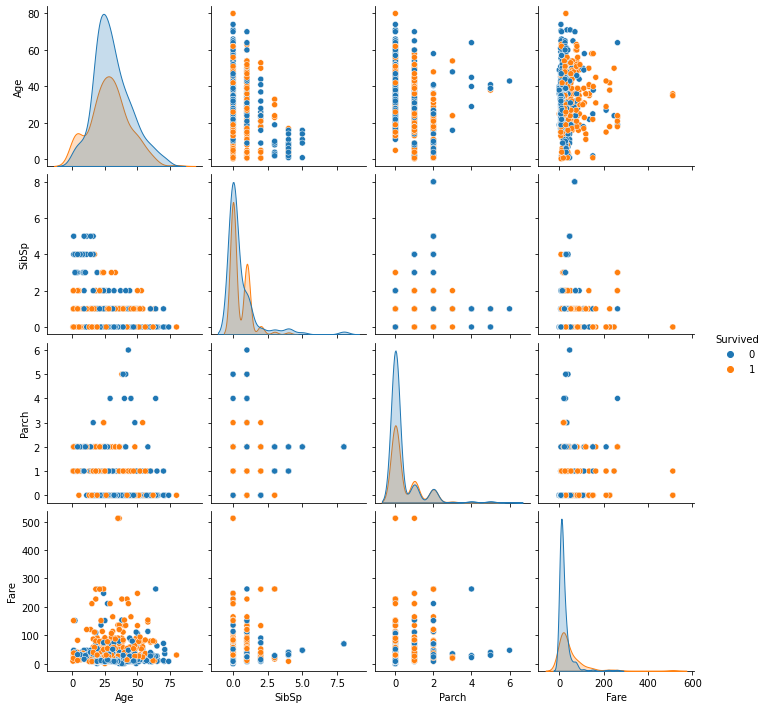

In [114]:
sns.pairplot(train_data[feat_num +['Survived']], hue = 'Survived')

<AxesSubplot:>

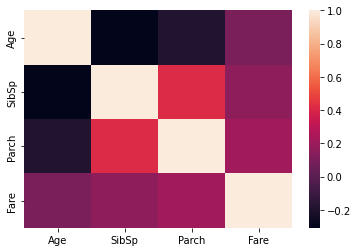

In [115]:
sns.heatmap(train_data[feat_num].corr())

In [116]:
train_data[feat_num].corr().Fare.sort_values(ascending = False)

Fare     1.000000
Parch    0.216225
SibSp    0.159651
Age      0.096067
Name: Fare, dtype: float64

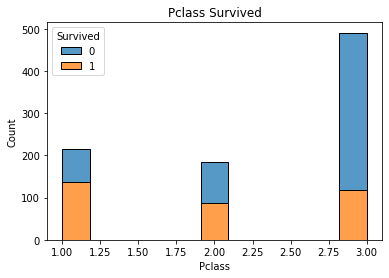

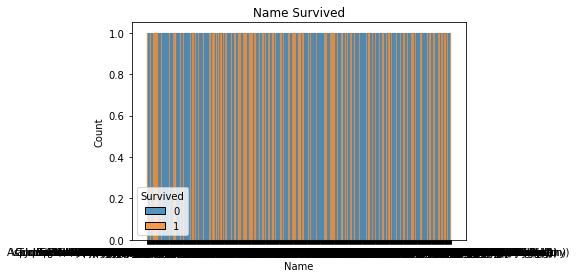

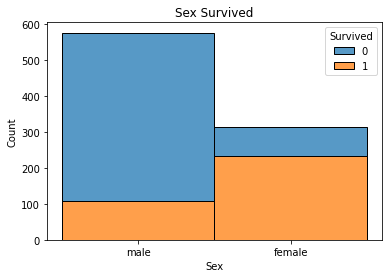

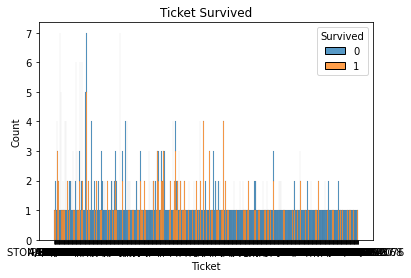

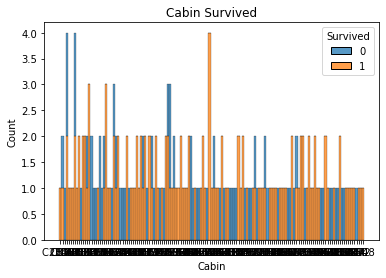

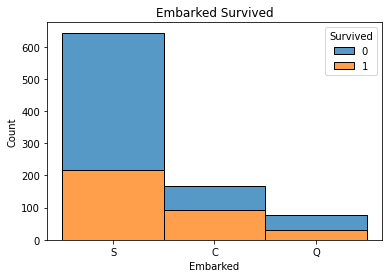

<Figure size 432x288 with 0 Axes>

In [117]:
for col in train_data[feat_cat].columns:
    sns.histplot(data = train_data[[col,'Survived']].loc[train_data[col].isnull() == False],x = col,hue = 'Survived',multiple = 'stack')
    plt.title(col + ' Survived')
    plt.figure()

In [118]:
train_data[feat_num + ['Survived']].groupby(['Survived']).agg(['mean'])

,Age,SibSp,Parch,Fare
,mean,mean,mean,mean
Survived,,,,
0,30.626179,0.553734,0.329690,22.117887
1,28.343690,0.473684,0.464912,48.395408


In [119]:
train_data[feat_num + ['Survived','Sex']].groupby(['Survived','Sex']).agg(['mean'])

Age     SibSp     Parch       Fare
                      mean      mean      mean       mean
Survived Sex                                             
0        female  25.046875  1.209877  1.037037  23.024385
         male    31.618056  0.440171  0.207265  21.960993
1        female  28.847716  0.515021  0.515021  51.938573
         male    27.276022  0.385321  0.357798  40.821484

In [120]:
def missing(data):
    missing = data.isnull().sum().sort_values(ascending = False)
    percent = data.isnull().sum() / data.isnull().count().sort_values(ascending = False)
    missing_data = pd.concat([missing,percent], axis = 1, keys = ['Missing', 'Percentage'])
    return missing_data.head()

missing(train_data)

,Missing,Percentage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000


In [121]:
train_data.loc[train_data['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<AxesSubplot:xlabel='Embarked', ylabel='Count'>

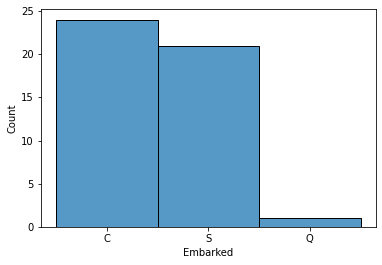

In [122]:
sns.histplot(data = train_data.loc[(train_data['Pclass'] == 1) 
                                   & (train_data['Sex'] == 'female') 
                                   & (train_data['Embarked'].isnull() == False)
                                   & (train_data['Fare'] >= 80)
                                   &  (train_data['Survived'] == 1)],x = 'Embarked')


(-4.786133338806649, 32.10238033989218)

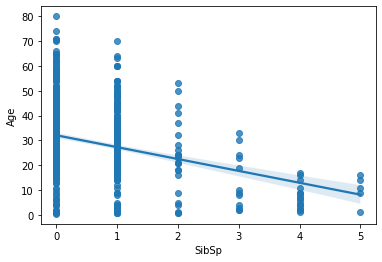

In [123]:
train_data = train_data.drop(train_data.loc[train_data['PassengerId'].isin([62,830])].index)
sns.regplot(data = train_data.loc[train_data['Age']!= 0], x = 'SibSp', y = 'Age')
x = np.array(train_data['SibSp'].loc[train_data['Age'].isnull() == False])
y = np.array(train_data['Age'].loc[train_data['Age'].isnull() == False])

m,b = np.polyfit(x,y,1)

m,b

In [124]:
x = train_data['SibSp'].loc[train_data['Age'].isnull() == True]
train_data['Age'].loc[train_data['Age'].isnull() == True] = m*x + b

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Survived                      
         <lambda_0> <lambda_1> <lambda_2>
Cabin                                    
A                 7         15  46.666667
B                33         45  73.333333
C                35         59  59.322034
D                25         33  75.757576
E                24         32  75.000000
F                 8         13  61.538462
G                 2          4  50.000000
No Cabin        206        687  29.985444
T                 0          1   0.000000

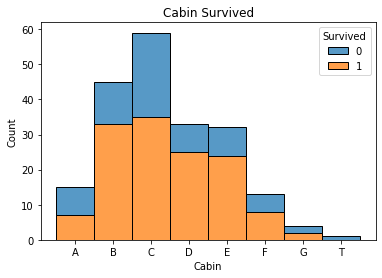

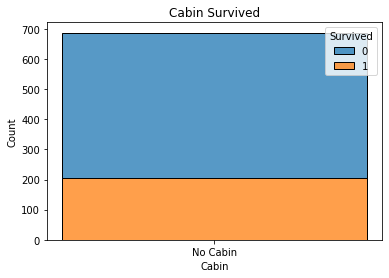

<Figure size 432x288 with 0 Axes>

In [125]:
def var_transCabin(data):
    data['Cabin'] = data['Cabin'].str[0]
    data.loc[data['Cabin'].isnull() == True,'Cabin'] = 'No Cabin'
    return data

train_data = var_transCabin(train_data)
var_trans = var_trans + ['Cabin']
sns.histplot(data = train_data.loc[train_data['Cabin'] != 'No Cabin'].sort_values(by='Cabin'),x = 'Cabin',hue = 'Survived',multiple = 'stack')
plt.title('Cabin Survived')
plt.figure()
sns.histplot(data = train_data.loc[train_data['Cabin']  == 'No Cabin'],x = 'Cabin',hue = 'Survived',multiple = 'stack')
plt.title('Cabin Survived')
plt.figure()

train_data[['Cabin','Survived']].groupby(['Cabin']).agg([lambda x: x.sum(),lambda x: x.count(), lambda x: x.sum() / x.count() * 100])

In [126]:
missing(train_data)

,Missing,Percentage
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0


In [127]:
def var_transAddVar(data):
    data['SibSpFlag'] = (data['SibSp'] != 0).astype('str')
    data['ParchFlag'] =  (data['Parch'] != 0).astype('str')
    data['SibSpParchFlag'] = data[['SibSpFlag','ParchFlag']].max(axis=1)
    data['SibSpParch'] = data[['SibSp','Parch']].sum(axis=1)
    data['Title'] = data['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])
    data['IndividualFare'] = (data['Fare']+1) / (data['SibSpParch']+1)
    return data

train_data = var_transAddVar(train_data)
var_trans = var_trans + ['AddVar']

feat_cat = feat_cat + ['SibSpFlag','ParchFlag','SibSpParchFlag','Title']
feat_cat.remove('Name')
feat_cat.remove('Ticket')
feat_num = feat_num + ['SibSpParch', 'IndividualFare']
print(feat_cat)
print(feat_num)

['Pclass', 'Sex', 'Cabin', 'Embarked', 'SibSpFlag', 'ParchFlag', 'SibSpParchFlag', 'Title']
['Age', 'SibSp', 'Parch', 'Fare', 'SibSpParch', 'IndividualFare']


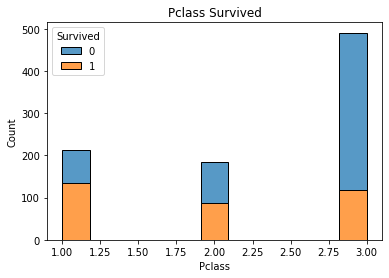

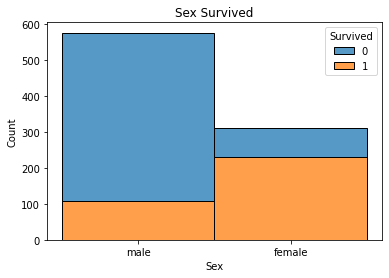

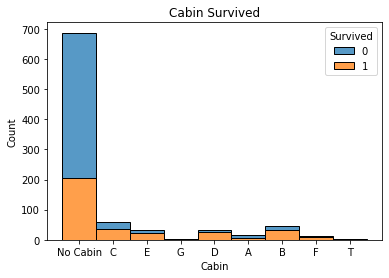

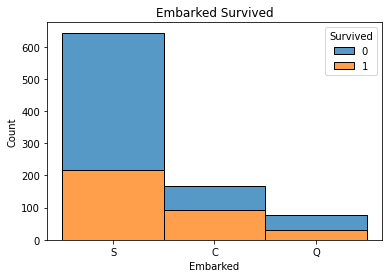

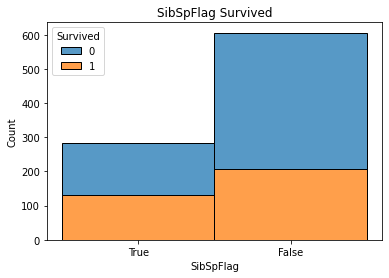

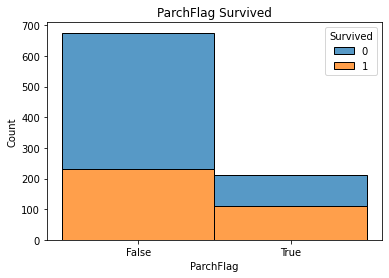

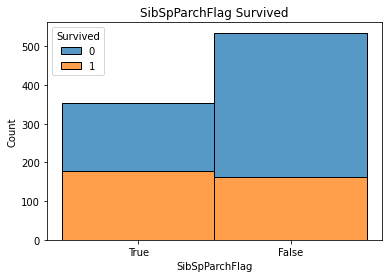

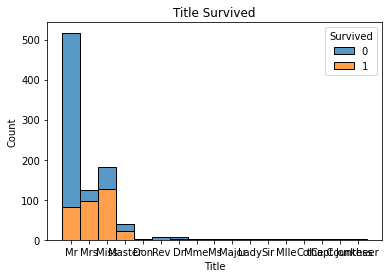

<Figure size 432x288 with 0 Axes>

In [128]:
for col in train_data[feat_cat]:
    sns.histplot(data = train_data,x = col,hue = 'Survived',multiple = 'stack')
    plt.title(col +' Survived')
    plt.figure()

<Figure size 432x288 with 0 Axes>

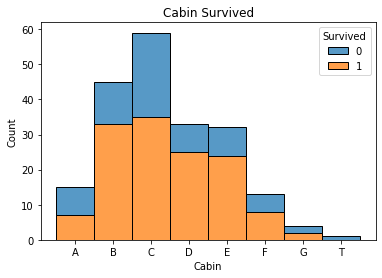

<Figure size 432x288 with 0 Axes>

In [129]:
sns.histplot(data = train_data.sort_values(by = 'Cabin').loc[train_data['Cabin'] != 'No Cabin'],x = 'Cabin',hue = 'Survived',multiple = 'stack')
plt.title('Cabin Survived')
plt.figure()

Text(0.5, 1.0, 'Cabin_Grouped Survived')

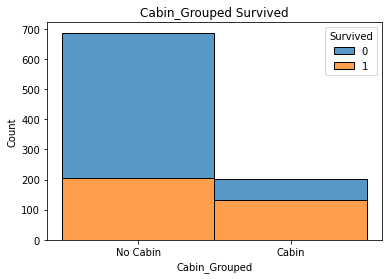

In [130]:
def var_transCabin_Grouped(data):
    data['Cabin_Grouped'] = 'No Cabin'
    data.loc[data['Cabin'] !='No Cabin','Cabin_Grouped'] = 'Cabin'
    return data

train_data = var_transCabin_Grouped(train_data)
var_trans = var_trans + ['Cabin_Grouped']

feat_cat = feat_cat + ['Cabin_Grouped']
train_data.head(5)

sns.histplot(data = train_data,x = 'Cabin_Grouped',hue = 'Survived',multiple = 'stack')
plt.title('Cabin_Grouped Survived')

Text(0.5, 1.0, 'ParentChild Survived')

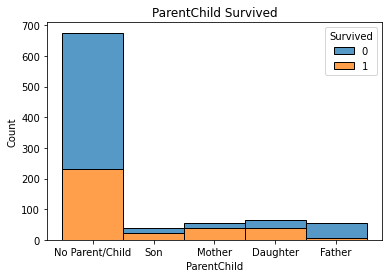

In [131]:

def var_transParentChild(data):
    data.loc[data['Parch'] == 0,'ParentChild'] = 'No Parent/Child'
    data.loc[(data['ParentChild'].isnull() == True) & (data['Title'] == 'Mr'),'ParentChild'] = 'Father'
    data.loc[(data['ParentChild'].isnull() == True) & (data['Title'] == 'Mrs'),'ParentChild'] = 'Mother'
    data.loc[(data['ParentChild'].isnull() == True) & (data['Title'] == 'Miss'),'ParentChild'] = 'Daughter'
    data.loc[(data['ParentChild'].isnull() == True) & (data['Title'] == 'Master'),'ParentChild'] = 'Son'
    data.loc[(data['ParentChild'].isnull() == True) & (data['Sex'] == 'male'),'ParentChild'] = 'Father'
    data.loc[(data['ParentChild'].isnull() == True) & (data['Sex'] == 'female'),'ParentChild'] = 'Mother'
    return data

train_data = var_transParentChild(train_data)
var_trans = var_trans + ['ParentChild']

sns.histplot(data = train_data,x = 'ParentChild',hue = 'Survived',multiple = 'stack')
plt.title('ParentChild Survived')

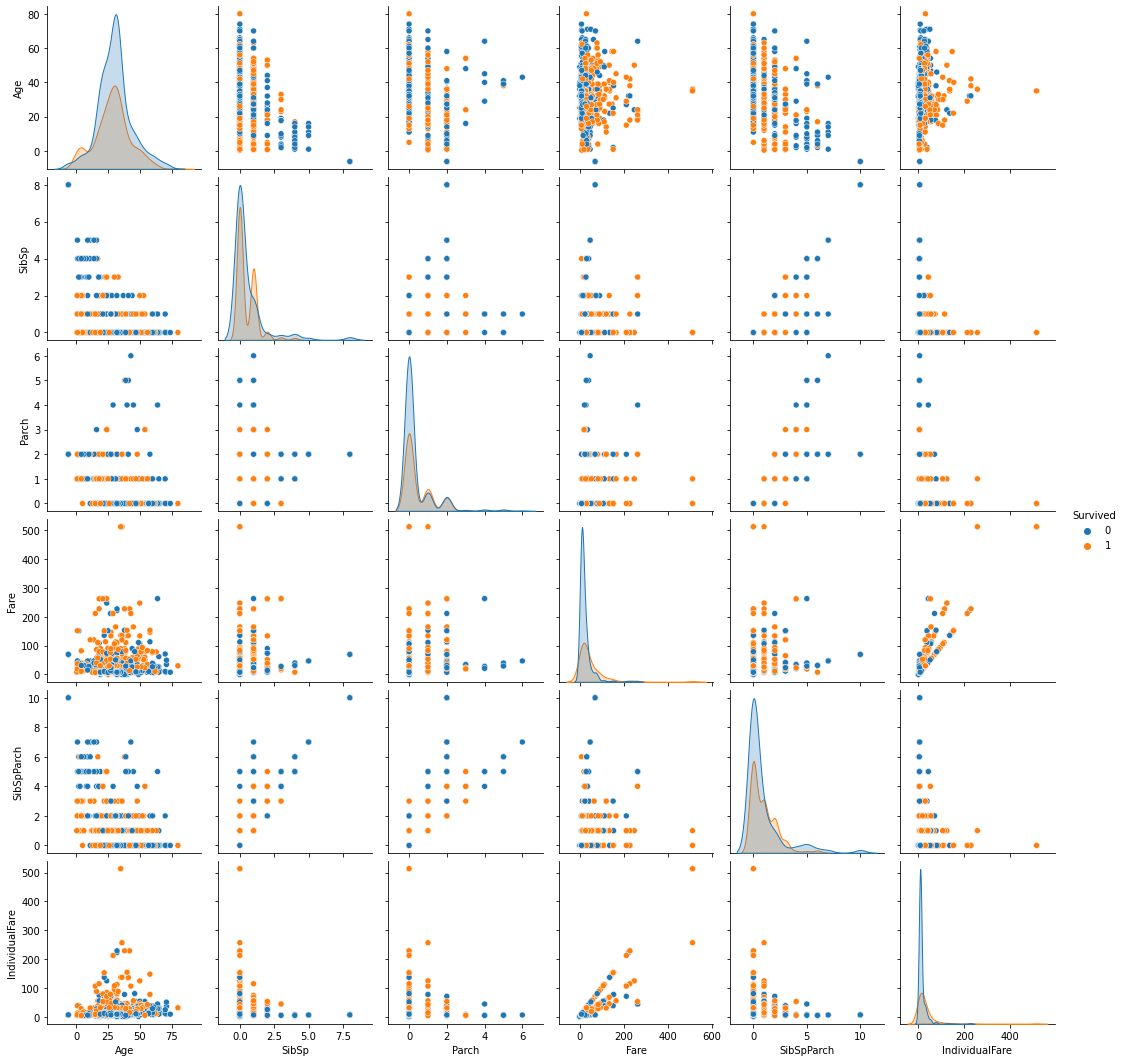

In [132]:
feat_cat = feat_cat + ['ParentChild']
sns.pairplot(train_data[feat_num+['Survived']], hue = 'Survived')

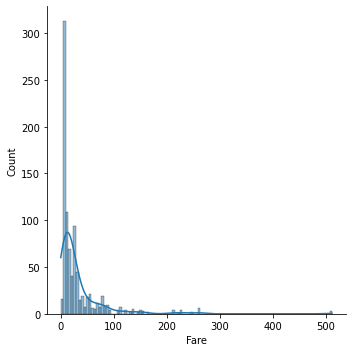

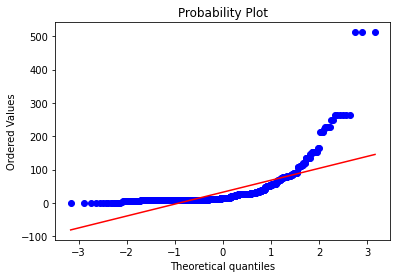

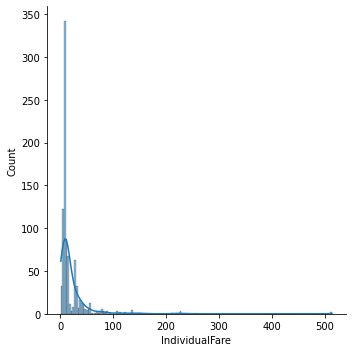

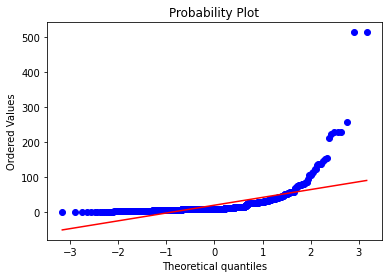

In [133]:
sns.displot(train_data['Fare'], kde = True)
fig = plt.figure()
res = stats.probplot(train_data['Fare'], plot = plt)

sns.displot(train_data['IndividualFare'], kde = True)
fig = plt.figure()
res = stats.probplot(train_data['IndividualFare'], plot = plt)

In [134]:
train_data.sort_values(by='IndividualFare',ascending = False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSpFlag,ParchFlag,SibSpParchFlag,SibSpParch,Title,IndividualFare,Cabin_Grouped,ParentChild
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00000,0,0,PC 17755,512.3292,B,C,False,False,False,0,Mr,513.3292,Cabin,No Parent/Child
258,259,1,1,"Ward, Miss. Anna",female,35.00000,0,0,PC 17755,512.3292,No Cabin,C,False,False,False,0,Miss,513.3292,No Cabin,No Parent/Child
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00000,0,1,PC 17755,512.3292,B,C,False,True,True,1,Mr,256.6646,Cabin,Father
380,381,1,1,"Bidois, Miss. Rosalie",female,42.00000,0,0,PC 17757,227.5250,No Cabin,C,False,False,False,0,Miss,228.5250,No Cabin,No Parent/Child
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.00000,0,0,PC 17757,227.5250,C,C,False,False,False,0,Miss,228.5250,Cabin,No Parent/Child
557,558,0,1,"Robbins, Mr. Victor",male,32.10238,0,0,PC 17757,227.5250,No Cabin,C,False,False,False,0,Mr,228.5250,No Cabin,No Parent/Child
527,528,0,1,"Farthing, Mr. John",male,32.10238,0,0,PC 17483,221.7792,C,S,False,False,False,0,Mr,222.7792,Cabin,No Parent/Child
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.00000,0,0,24160,211.3375,B,S,False,False,False,0,Miss,212.3375,Cabin,No Parent/Child
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.00000,0,0,PC 17582,153.4625,C,S,False,False,False,0,Miss,154.4625,Cabin,No Parent/Child
708,709,1,1,"Cleaver, Miss. Alice",female,22.00000,0,0,113781,151.5500,No Cabin,S,False,False,False,0,Miss,152.5500,No Cabin,No Parent/Child


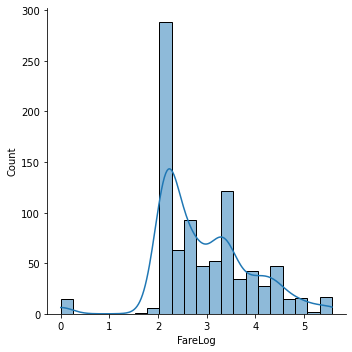

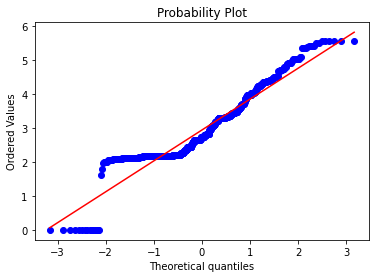

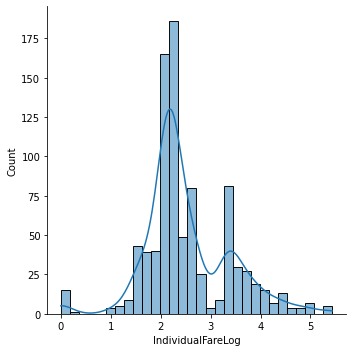

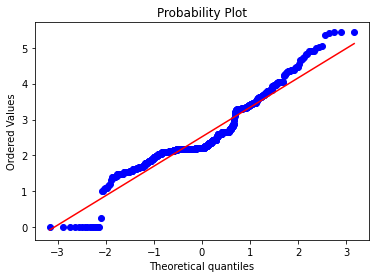

In [135]:
train_data = train_data.drop(train_data.loc[train_data['PassengerId'].isin([259,738,680])].index)
#train_data = train_data.drop(train_data.loc[train_data['Fare']==0].index)
def var_transFareLog(data):
    data['FareLog'] = np.log(data['Fare']+1)
    data['IndividualFareLog'] = np.log(data['IndividualFare'])
    return data

train_data = var_transFareLog(train_data)
var_trans = var_trans + ['FareLog']

sns.displot(train_data['FareLog'], kde = True)
fig = plt.figure()
res = stats.probplot(train_data['FareLog'], plot = plt)
sns.displot(train_data['IndividualFareLog'], kde = True)
fig = plt.figure()
res = stats.probplot(train_data['IndividualFareLog'], plot = plt)

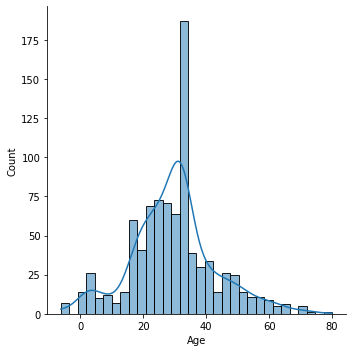

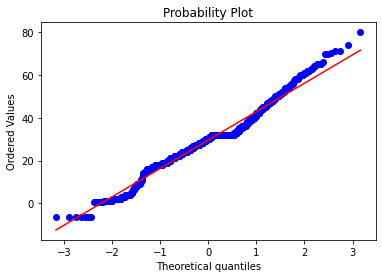

In [136]:
sns.displot(train_data['Age'], kde = True)
fig = plt.figure()
res = stats.probplot(train_data['Age'], plot = plt)

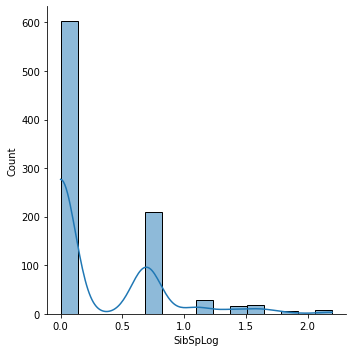

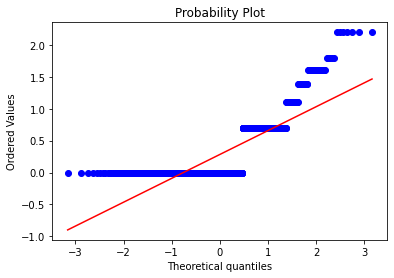

In [137]:
train_data['SibSpLog'] = np.log(train_data['SibSp']+1)
sns.displot(train_data['SibSpLog'], kde = True)
fig = plt.figure()
res = stats.probplot(train_data['SibSpLog'], plot = plt)

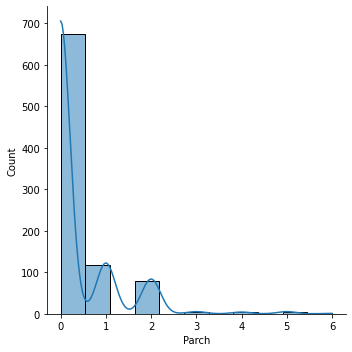

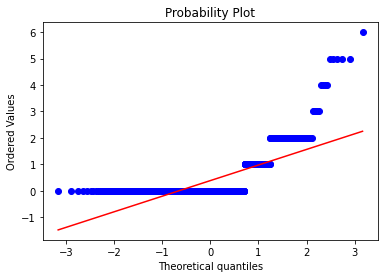

In [138]:
sns.displot(train_data['Parch'], kde = True)
fig = plt.figure()
res = stats.probplot(train_data['Parch'], plot = plt)

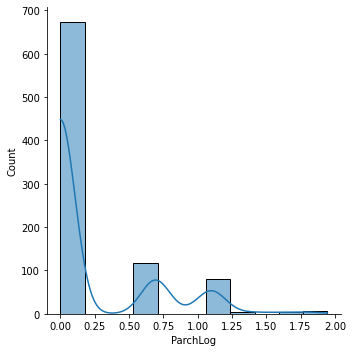

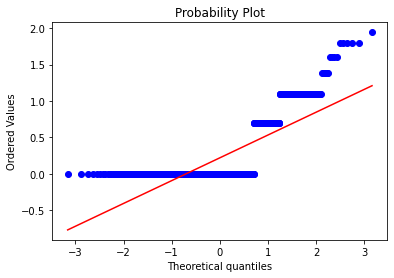

In [139]:
train_data['ParchLog'] = np.log(train_data['Parch']+1)
sns.displot(train_data['ParchLog'], kde = True)
fig = plt.figure()
res = stats.probplot(train_data['ParchLog'], plot = plt)

In [140]:
feat_num = feat_num + ['FareLog', 'IndividualFareLog']

print(feat_cat)
print(feat_num)

['Pclass', 'Sex', 'Cabin', 'Embarked', 'SibSpFlag', 'ParchFlag', 'SibSpParchFlag', 'Title', 'Cabin_Grouped', 'ParentChild']
['Age', 'SibSp', 'Parch', 'Fare', 'SibSpParch', 'IndividualFare', 'FareLog', 'IndividualFareLog']


In [141]:
train_data[(feat_num + ['Survived'])].groupby(['Survived']).describe()

Age                                                          \
          count       mean        std       min   25%   50%   75%   max   
Survived                                                                  
0         549.0  30.256140  13.197149 -6.186686  22.0  31.0  35.0  74.0   
1         337.0  28.463078  13.779765  0.420000  21.0  29.0  35.0  80.0   

          SibSp                                               Parch            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
Survived                                                                        
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0  549.0  0.329690   
1         337.0  0.480712  0.711564  0.0  0.0  0.0  1.0  4.0  337.0  0.468843   

                                              Fare                             \
               std  min  25%  50%  75%  max  count       mean        std  min   
Survived                                                                        
0         0.823166  0.0  0.0  0.0  0.0  6.0  549.0  22.117887  31.388207  0.0   
1         0.775217  0.0  0.0  0.0  1.0  5.0  337.0  44.077869  50.544834  0.0   

                                        SibSpParch                           \
              25%   50%      75%    max      count      mean       std  min   
Survived                                                                      
0          7.8542  10.5  26.0000  263.0      549.0  0.883424  1.830669  0.0   
1         12.3500  26.0  56.4958  263.0      337.0  0.949555  1.190416  0.0   

                              IndividualFare                             \
          25%  50%  75%   max          count       mean        std  min   
Survived                                                                  
0         0.0  0.0  1.0  10.0          549.0  14.442472  18.942907  1.0   
1         0.0  1.0  2.0   6.0          337.0  26.824235  32.994292  1.0   

                                          FareLog                           \
            25%      50%     75%      max   count      mean       std  min   
Survived                                                                     
0         8.225   8.8958  13.875  228.525   549.0  2.710095  0.869085  0.0   
1         8.750  13.5000  31.000  228.525   337.0  3.335333  0.950695  0.0   

                                                 IndividualFareLog            \
               25%       50%       75%       max             count      mean   
Survived                                                                       
0         2.180892  2.442347  3.295837  5.575949             549.0  2.334096   
1         2.591516  3.295837  4.051712  5.575949             337.0  2.822234   

                                                                 
               std  min       25%       50%       75%       max  
Survived                                                         
0         0.753642  0.0  2.107178  2.185579  2.630089  5.431646  
1         0.917248  0.0  2.169054  2.602690  3.433987  5.431646

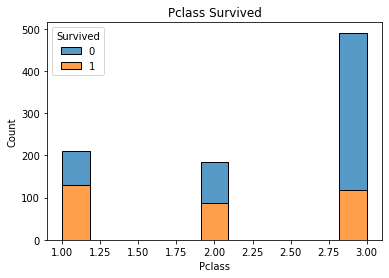

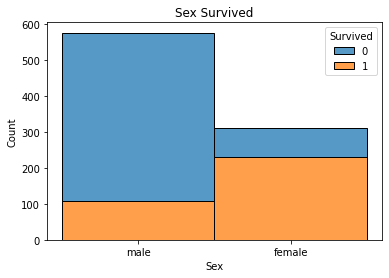

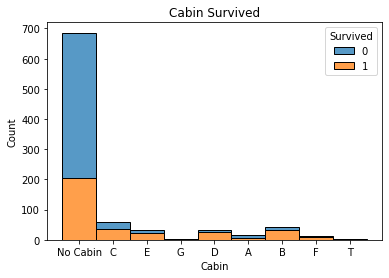

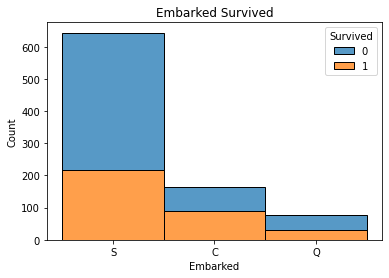

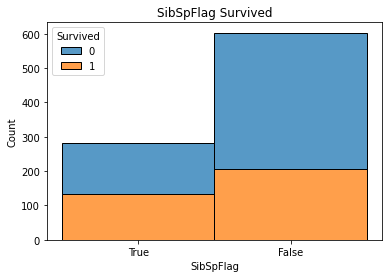

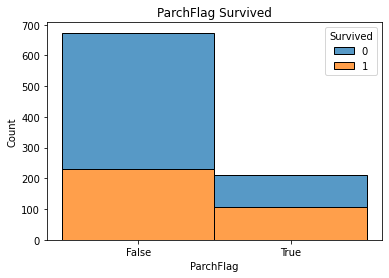

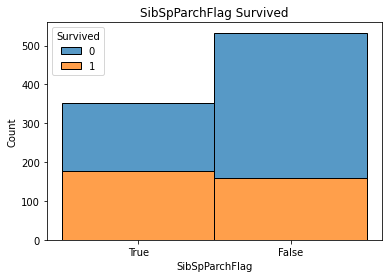

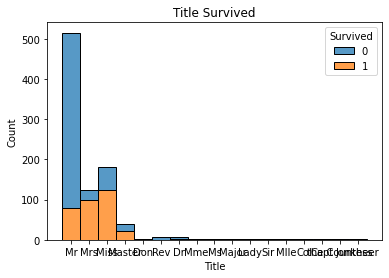

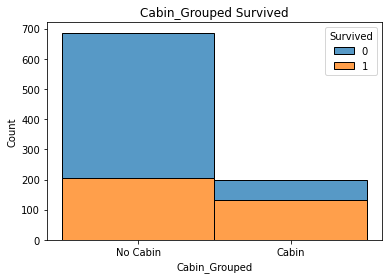

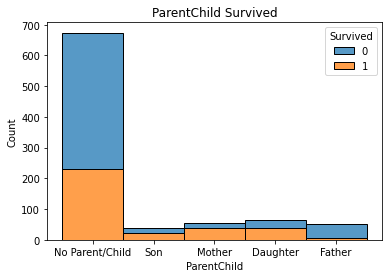

<Figure size 432x288 with 0 Axes>

In [142]:
for col in train_data[feat_cat]:
    sns.histplot(data = train_data,x = col,hue = 'Survived',multiple = 'stack')
    plt.title(col +' Survived')
    plt.figure()

In [143]:
feat_num.remove('SibSp')
feat_num.remove('Parch')
feat_num.remove('Fare')
feat_num.remove('IndividualFare')


print(feat_num)
print(feat_cat)

['Age', 'SibSpParch', 'FareLog', 'IndividualFareLog']
['Pclass', 'Sex', 'Cabin', 'Embarked', 'SibSpFlag', 'ParchFlag', 'SibSpParchFlag', 'Title', 'Cabin_Grouped', 'ParentChild']


In [144]:
feat_num = ['Age', 'FareLog', 'IndividualFareLog']
feat_cat = ['Pclass', 'Sex', 'Embarked', 'SibSpFlag', 'ParchFlag', 'Title', 'Cabin_Grouped']
feature = train_data[feat_num].join(
    pd.get_dummies(train_data[feat_cat]))
y = train_data['Survived']

In [145]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = feature.copy()
x_scaled[feat_num] = scale.fit_transform(feature[feat_num])
x_scaled.head()

,Age,FareLog,IndividualFareLog,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SibSpFlag_False,SibSpFlag_True,ParchFlag_False,ParchFlag_True,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Cabin_Grouped_Cabin,Cabin_Grouped_No Cabin
0,-0.563776,-0.882002,-1.293695,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0.627175,1.403165,1.252612,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.266038,-0.799200,-0.388225,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.403871,1.098081,0.912665,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0.403871,-0.784556,-0.371907,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [146]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]

In [147]:
max_features = ['auto', 'sqrt']

In [148]:
max_depth = [2,4]

In [149]:
min_sample_split = [2,5]

In [150]:
min_sample_leaf = [1,2]

In [151]:
bootstrap = [True,False]

In [152]:
param_grid =  {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_sample_split,
               'min_samples_leaf': min_sample_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [104]:
rf_grid.fit(x_scaled,y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 25, 41, 56, 72, 87, 103, 118, 134,
                                          150]},
             verbose=2)

In [105]:
rf_grid.fit(x_scaled,y)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 25, 41, 56, 72, 87, 103, 118, 134,
                                          150]},
             verbose=2)

In [106]:
test_data = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Titanic%20-%20Machine%20Learning%20from%20Disaster/train.csv')
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [155]:
missing(test_data)

,Missing,Percentage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000


/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


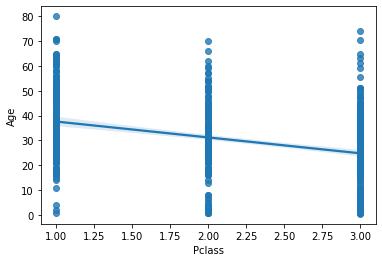

In [156]:
test_data.loc[test_data['Fare'].isnull() ==True,'Fare'] = test_data.loc[(test_data['Pclass'] == 3) & (test_data['Fare'].isnull() ==False),'Fare'].mean()
sns.regplot(data = test_data.loc[test_data['Age']!= 0], x = 'Pclass', y = 'Age')
x = np.array(test_data['Pclass'].loc[test_data['Age'].isnull() == False])
y = np.array(test_data['Age'].loc[test_data['Age'].isnull() == False])

m,b = np.polyfit(x,y,1)

m,b
x = test_data['Pclass'].loc[test_data['Age'].isnull() == True]
test_data['Age'].loc[test_data['Age'].isnull() == True] = m*x + b

In [157]:
missing(test_data)

,Missing,Percentage
Cabin,687,0.771044
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000


In [158]:
var_trans

['Pclass', 'Cabin', 'AddVar', 'Cabin_Grouped', 'ParentChild', 'FareLog']